# 0. PROPUESTA JULIO DÍAZ




# 1. PARTE 1 CARGA DE DATOS


In [2]:
import pandas as pd


path = 'pe_properties.csv'
df=pd.read_csv(path)





In [3]:
df

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,1qOI7X9aqAcO7PzjX1B29Q==,Propiedad,2021-06-03,2021-08-27,2021-06-03,NaN,NaN,Perú,Lima,Lima,...,5.0,NaN,NaN,450000.0,USD,NaN,CASA DE PLAYA VENDO EN LAS LAGUNAS,<b>CASA DE PLAYA VENDO EN LAS LAGUNAS</b><br><...,Casa,Venta
1,J350rcSI7Fx+92Wb1ev7rw==,Propiedad,2021-06-03,2021-07-07,2021-06-03,NaN,NaN,Perú,Arequipa,Arequipa,...,6.0,NaN,NaN,1050000.0,USD,NaN,HERMOSA CASA DE ENSUEÑOS EN CERRO COLORADO,<b>HERMOSA CASA DE ENSUEÑOS EN CERRO COLORADO<...,Casa,Venta
2,P+3USxoY2w5HQwg1N8JCtg==,Propiedad,2021-06-03,9999-12-31,2021-06-03,-8.095431,-79.053100,Perú,La Libertad,Trujillo,...,4.0,NaN,NaN,179000.0,USD,NaN,[ VENTA ]: ESTRENA TU CASA EN URB. SOL Y LUZ C...,<b>[ VENTA ]: ESTRENA TU CASA EN URB. SOL Y LU...,Casa,Venta
3,I9llUYb61GVgLNDUJ6CT5A==,Propiedad,2021-06-03,2021-06-04,2021-06-03,-13.840915,-76.250830,Perú,Ica,Ica,...,NaN,1120.0,NaN,52000.0,USD,Mensual,Lote venta,Hábitat VIp vende exclusivo terreno 1120 m2 e...,Lote,Venta
4,d7Sw3mL1Vq0dmzoXNpJUNQ==,Propiedad,2021-06-03,2021-06-04,2021-06-03,-12.799091,-76.569120,Perú,Lima,Lima,...,NaN,500.0,NaN,70000.0,USD,Mensual,Lote venta,Hábitat Vip Vende lote 500 m2 \r\nUbicado a ta...,Lote,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100619,WyZKSpo/YvheNozTnPoVHA==,Propiedad,2021-05-27,2021-06-15,2021-05-27,NaN,NaN,Perú,Arequipa,Arequipa,...,5.0,NaN,NaN,428000.0,USD,NaN,CASA EN VENTA EN EL CERCADO DE AREQUIPA,<b>CASA EN VENTA EN EL CERCADO DE AREQUIPA</b>...,Casa,Venta
100620,6cy+KTI2+ctSeXDIycRZ9Q==,Propiedad,2021-05-27,2021-10-04,2021-05-27,-12.260809,-76.884048,Perú,Lima,Lima,...,5.0,NaN,NaN,699000.0,USD,NaN,Venta de Exclusiva Casa en Condominio Paso Chico,<b>Venta de Exclusiva Casa en Condominio Paso ...,Casa,Venta
100621,yatXnRoWUVmgvJ16zXUY3Q==,Propiedad,2021-05-27,2021-08-16,2021-05-27,-12.094668,-76.899478,Perú,Lima,Lima,...,6.0,350.0,288.0,300000.0,USD,Mensual,VENDO 2 lindas casas en un mismo terreno en La...,"VENDO 2 LINDAS CASAS EN UN MISMO TERRENO, LOS ...",Casa,Venta
100622,j2m055N7hCGWkRcgMvTk2w==,Propiedad,2021-05-27,9999-12-31,2021-05-27,-10.742903,-77.753817,Perú,Lima,Barranca,...,6.0,250.0,1686.0,758497.0,USD,Mensual,OPORTUNIDAD LOCAL EN VENTA PARA TO TIPO DE INV...,Local Ubicado en la urb virgen de chapi en Bar...,Departamento,Venta


In [4]:
### PASO 1 DIVIR ENTRE /1000 EL PRECIO
### REVISION DE NANS
nul=df.isnull().sum()

df = df[df['price'].notna()]

In [5]:
### MONEDA USADA GRAFICA DE VALORES DE UNA COLUMNA 

#df.a.value_counts().sort_values().plot(kind = 'bar')
for i in df.columns:
  print(i,":", df[i].isnull().sum().sum(),"CANTIDAD DE NANS")
  print(i,":", df[i].isnull().sum().sum()*100/len(df),"%")
  

id : 0 CANTIDAD DE NANS
id : 0.0 %
ad_type : 0 CANTIDAD DE NANS
ad_type : 0.0 %
start_date : 0 CANTIDAD DE NANS
start_date : 0.0 %
end_date : 0 CANTIDAD DE NANS
end_date : 0.0 %
created_on : 0 CANTIDAD DE NANS
created_on : 0.0 %
lat : 13829 CANTIDAD DE NANS
lat : 13.833565076475237 %
lon : 13829 CANTIDAD DE NANS
lon : 13.833565076475237 %
l1 : 0 CANTIDAD DE NANS
l1 : 0.0 %
l2 : 0 CANTIDAD DE NANS
l2 : 0.0 %
l3 : 3433 CANTIDAD DE NANS
l3 : 3.4341332639771123 %
l4 : 21953 CANTIDAD DE NANS
l4 : 21.960246881470887 %
l5 : 54257 CANTIDAD DE NANS
l5 : 54.274910720537775 %
l6 : 99138 CANTIDAD DE NANS
l6 : 99.1707263396921 %
rooms : 97793 CANTIDAD DE NANS
rooms : 97.82528234317324 %
bedrooms : 58273 CANTIDAD DE NANS
bedrooms : 58.292236438024545 %
bathrooms : 23548 CANTIDAD DE NANS
bathrooms : 23.555773405223725 %
surface_total : 83013 CANTIDAD DE NANS
surface_total : 83.04040333309992 %
surface_covered : 81389 CANTIDAD DE NANS
surface_covered : 81.41586723618794 %
price : 0 CANTIDAD DE NANS
pr

<AxesSubplot:>

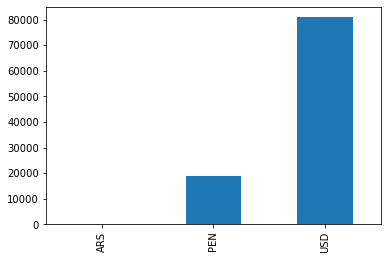

In [6]:
df.currency.value_counts().sort_values().plot(kind = 'bar')


In [7]:
### CONVERSION A DOLARES
df.loc[df['currency'] == 'PEN', 'price'] = df['price']*0.25
df.loc[df['currency'] != 'PEN', 'price'] = df['price']
df.loc[df['currency'] == 'ARS', 'price'] = df['price']*0.0066102591221576

In [8]:
#### REDUCCION A K DE PRECIOS
###  EJM 5000 = 5K
df['price']=df['price']/1000


C:\Users\Hubble\AppData\Local\Temp\ipykernel_30236\2893839276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price']=df['price']/1000


In [9]:
df=df.drop(['id', 'ad_type', 'start_date', 'end_date', 'created_on',
            'lat', 'lon','l1','l2','l3','l4','l6','rooms','surface_total',
            'surface_covered','currency','price_period', 'description',
            'title','operation_type'],axis=1)
## # ELIMINAR NANDS DE L5
df = df[df['l5'].notna()]


In [10]:
df = df.reset_index(drop=True)

df=df[['l5', 'bedrooms', 'bathrooms', 'property_type', 'price']]


In [11]:

####DATAFRAME
X = df.iloc[:, :-1].values 
y = df.iloc[:,-1].values


In [12]:
for i in df.columns:
  print(i,":", df[i].isnull().sum().sum(),"CANTIDAD DE NANS")
  print(i,":", df[i].isnull().sum().sum()*100/len(df),"%")

l5 : 0 CANTIDAD DE NANS
l5 : 0.0 %
bedrooms : 24158 CANTIDAD DE NANS
bedrooms : 52.8505797418508 %
bathrooms : 8439 CANTIDAD DE NANS
bathrooms : 18.462043316560926 %
property_type : 0 CANTIDAD DE NANS
property_type : 0.0 %
price : 0 CANTIDAD DE NANS
price : 0.0 %


In [13]:
##MEAN
print(df.bedrooms.mean())
print(df.bathrooms.mean())

##MEDIA 
import numpy as np 
print(np.median(df.bedrooms))
print(np.median(df.bathrooms))

## REMPLAZAR NANS CON LA MEDIA 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median') 

imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:,1:3])

2.88409428359317
2.6193555311099783
nan
nan


In [14]:
X

array([['Lince', 2.0, 1.0, 'Departamento'],
       ['Lince', 3.0, 4.0, 'Departamento'],
       ['Lince', 2.0, 2.0, 'Departamento'],
       ...,
       ['Lurín', 6.0, 5.0, 'Casa'],
       ['La Molina', 3.0, 6.0, 'Casa'],
       ['Santiago de Surco', 5.0, 6.0, 'Casa']], dtype=object)

In [15]:
y

array([ 124. ,  363.9,  120. , ...,  699. ,  300. , 1100. ])

In [16]:

##NOMBRES DE DEPARTAMENTOS EN NUMEROS 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])


In [17]:

labelencoder_X2 = LabelEncoder()
X[:, 3] = labelencoder_X2.fit_transform(X[:, 3])


In [18]:
## SPLIT DE DATOS
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)



X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test  = np.asarray(y_test).astype(np.float32)

In [19]:

from keras.models import Sequential
from keras.layers import Dense

#RED NEURONAL
model = Sequential()
model.add(Dense(4000, input_dim=4, activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=38, batch_size=100)


Epoch 1/38
366/366 [==============================] - 9s 7ms/step - loss: 4598640.5000 - accuracy: 0.0117
Epoch 2/38
366/366 [==============================] - 2s 6ms/step - loss: 4588868.0000 - accuracy: 0.0117
Epoch 3/38
366/366 [==============================] - 2s 6ms/step - loss: 4585684.0000 - accuracy: 0.0117
Epoch 4/38
366/366 [==============================] - 2s 6ms/step - loss: 4577605.5000 - accuracy: 0.0117
Epoch 5/38
366/366 [==============================] - 2s 6ms/step - loss: 4580441.5000 - accuracy: 0.0117
Epoch 6/38
366/366 [==============================] - 2s 6ms/step - loss: 4577409.0000 - accuracy: 0.0117
Epoch 7/38
366/366 [==============================] - 2s 5ms/step - loss: 4578614.0000 - accuracy: 0.0117
Epoch 8/38
366/366 [==============================] - 2s 5ms/step - loss: 4575885.0000 - accuracy: 0.0117
Epoch 9/38
366/366 [==============================] - 2s 5ms/step - loss: 4574789.5000 - accuracy: 0.0117
Epoch 10/38
366/366 [=========================

In [20]:
y_pred= model.predict(X_test)
y_pred= np.round(y_pred)


286/286 [==============================] - 1s 2ms/step


In [21]:
a = y_test.reshape(-1,1)   # valores reales
b = y_pred.reshape(-1,1)   # valores predichos
c = np.concatenate([a,b],axis=1)
c = pd.DataFrame(c,columns=['y_real','y_model'])
c.head()



,y_real,y_model
0,315.000000,298.0
1,67.500000,135.0
2,110.374748,137.0
3,1.210000,0.0
4,68.000000,110.0


In [22]:
c = pd.DataFrame(c)
c.corr()

,y_real,y_model
y_real,1.000000,0.212785
y_model,0.212785,1.000000


In [23]:
c['error'] = np.abs(c.y_real - c.y_model)
c.head()


,y_real,y_model,error
0,315.000000,298.0,17.000000
1,67.500000,135.0,67.500000
2,110.374748,137.0,26.625252
3,1.210000,0.0,1.210000
4,68.000000,110.0,42.000000


In [24]:
mae = c.error.mean()
mae


262.5165100097656